In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline


In [2]:
data_dir = "./data/"


In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,AS,3,Administrative,IRCC,SheHer,Heterosexual,Caucasian,...,True,True,True,True,False,False,False,False,False,False
1,70000,0,Employee,AS,3,Administrative,IRCC,SheHer,Heterosexual,Caucasian,...,True,True,False,False,True,False,True,True,True,True
2,70001,1,Specialist,EC,4,Legal,IRCC,HeHim,Heterosexual,Caucasian,...,True,True,False,True,False,False,False,False,False,False
3,70001,1,Specialist,EC,4,Legal,IRCC,HeHim,Heterosexual,Caucasian,...,True,True,False,False,True,False,True,True,False,False
4,70002,2,Employee,PM,1,Finance,PSPC,HeHim,Homosexual,Caucasian,...,True,False,True,False,False,False,False,False,False,False


In [5]:
df.describe()

,eval_id,learner_id,level,openness,discrimination,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.356273,0.599913,0.009396,99624.641524,960.199067,181.865474,2.522032,4.581778,2.828797,6.519829,0.796773
std,7906.514896,7906.514896,1.804365,0.115686,0.067216,73716.390247,94.998638,96.418462,1.471887,1.497515,1.542975,1.735918,0.157379
min,70000.000000,0.000000,1.000000,0.400009,0.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.000000,4.000000,0.100000
25%,73428.750000,3428.750000,2.000000,0.499085,0.000000,30428.750000,880.000000,101.000000,1.000000,4.000000,2.000000,5.000000,0.700000
50%,77357.500000,7357.500000,3.000000,0.601010,0.000000,70357.500000,884.000000,102.000000,2.000000,5.000000,3.000000,6.000000,0.800000
75%,89570.250000,19570.250000,5.000000,0.699963,0.000000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.000000,8.000000,0.900000
max,91999.000000,21999.000000,7.000000,0.799971,1.200000,192999.000000,1078.000000,301.000000,8.000000,10.000000,9.000000,10.000000,1.000000


In [6]:
audience = df.audience
role = df.role

In [7]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [8]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                          
Employee   Administrative Asian           3.000000                0.166667   
                          Black           2.615385                0.153846   
                          Caucasian       2.944532                0.117274   
                          HispanicLatinx  3.578947                0.184211   
                          Indigenous      2.888889                0.095238   
...                                            ...                     ...   
Specialist Security       Black           3.000000                0.000000   
                          Caucasian       3.024691                0.098765   
                          HispanicLatinx  3.800000                0.000000   
                          Indigenous      4.125000                0.000000   
                          NoAnswer        2.428571                0.000000   

                                          openness  discrimination  \
audience   role           ethnicity                                  
Employee   Administrative Asian           0.619677        0.011111   
                          Black           0.624581        0.056410   
                          Caucasian       0.605371        0.008241   
                          HispanicLatinx  0.608143        0.042105   
                          Indigenous      0.570399        0.000000   
...                                            ...             ...   
Specialist Security       Black           0.614842        0.000000   
                          Caucasian       0.602746        0.000000   
                          HispanicLatinx  0.598554        0.000000   
                          Indigenous      0.466316        0.000000   
                          NoAnswer        0.666028        0.000000   

                                              module  current_skill  \
audience   role           ethnicity                                   
Employee   Administrative Asian           179.083333       2.444444   
                          Black           178.230769       2.820513   
                          Caucasian       179.917591       2.518225   
                          HispanicLatinx  206.500000       2.789474   
                          Indigenous      168.000000       2.825397   
...                                              ...            ...   
Specialist Security       Black           168.000000       3.500000   
                          Caucasian       182.777778       2.740741   
                          HispanicLatinx  141.400000       2.600000   
                          Indigenous      151.375000       2.000000   
                          NoAnswer        187.000000       1.571429   

                                          desired_skill  final_skill  \
audience   role           ethnicity                                    
Employee   Administrative Asian                4.527778     2.777778   
                          Black                4.948718     3.128205   
                          Caucasian            4.556260     2.838352   
                          HispanicLatinx       4.815789     3.052632   
                          Indigenous           4.825397     3.142857   
...                                                 ...          ...   
Specialist Security       Black                5.500000     3.833333   
                          Caucasian            4.765432     3.049383   
                          HispanicLatinx       4.600000     3.000000   
                          Indigenous           4.250000     2.250000   
                          NoAnswer             4.142857     1.857143   

                                          recommend    rating  ...  \
audience   role           ethnicity                            ...   
Employee   Administrative Asian            0.555556  6.972222  ...   
                          Black            0.435

In [9]:
scan.groupby('module').agg('mean')

,level,person_with_disability,openness,discrimination,current_skill,desired_skill,final_skill,recommend,rating,clear,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.348000,0.097333,0.600317,0.009200,2.522889,4.584222,2.545778,0.360667,6.006667,0.250444,...,1.0,0.287778,0.301111,0.396889,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.348000,0.097333,0.600317,0.009200,2.522889,4.584222,3.395333,0.515778,6.620444,0.390889,...,1.0,0.500667,0.130000,0.280000,1.0,0.389778,0.584222,0.551778,0.416889,0.362444
201,3.236111,0.106481,0.594714,0.011111,2.597222,4.652778,2.601852,0.310185,5.689815,0.282407,...,0.0,0.000000,0.000000,0.000000,1.0,0.351852,0.175926,0.444444,0.324074,0.361111
202,3.236111,0.106481,0.594714,0.011111,2.597222,4.652778,3.486111,0.550926,6.773148,0.625000,...,0.0,0.000000,0.000000,0.000000,1.0,0.273148,0.199074,0.444444,0.351852,0.365741
301,3.377333,0.102667,0.599680,0.009567,2.515333,4.573000,2.600667,0.560500,6.850000,0.605000,...,1.0,0.466667,0.464000,0.445500,1.0,0.602167,0.443667,0.313667,0.587500,0.480833


In [10]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

core = feedback[["module", "recommend", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]


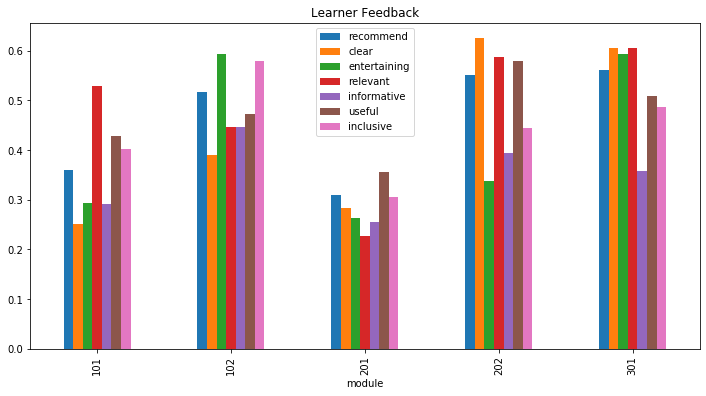

In [11]:
core.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6))

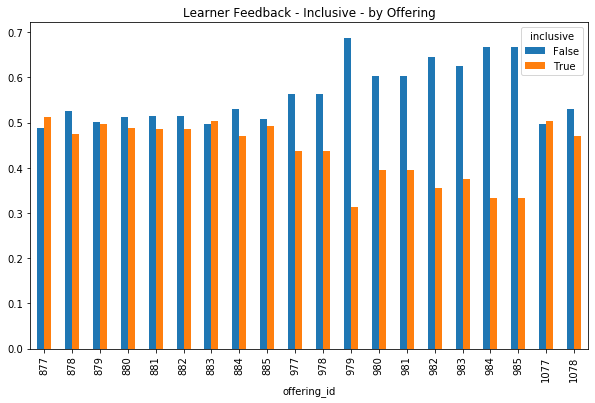

In [12]:
pd.crosstab(df.offering_id, df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - by Offering", kind="bar", figsize=(10,6))

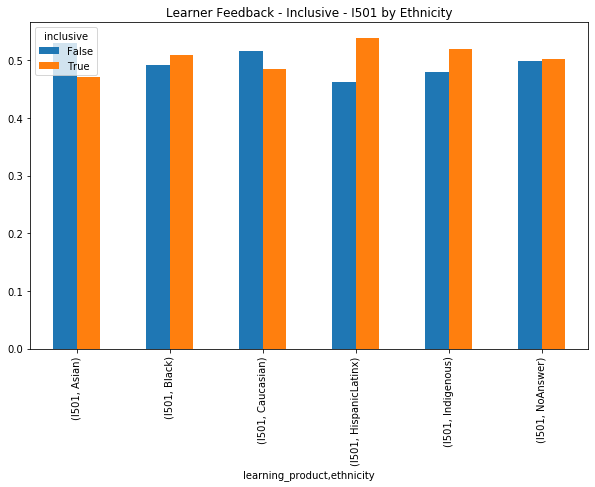

In [13]:
pd.crosstab([df.learning_product.where(df.learning_product=="I501"), df.ethnicity], df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - I501 by Ethnicity", kind="bar", figsize=(10,6))

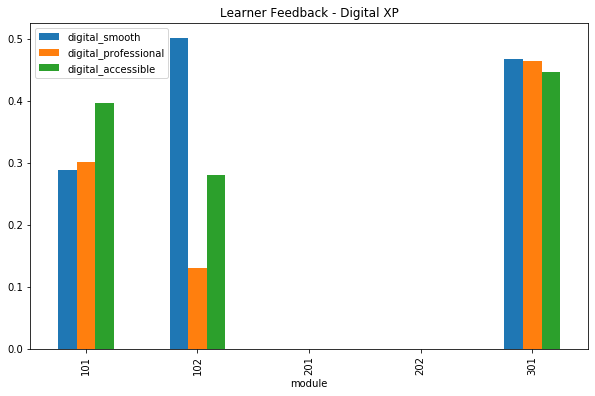

In [14]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

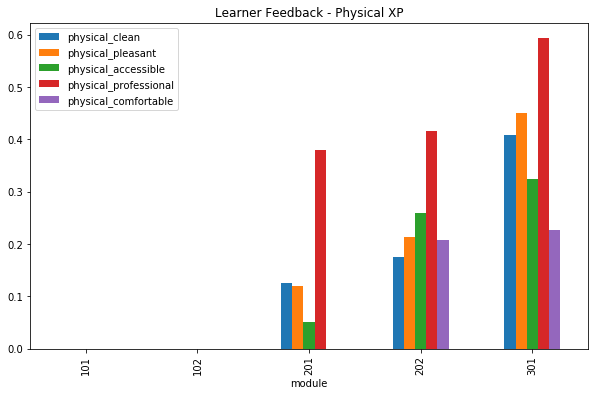

In [15]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

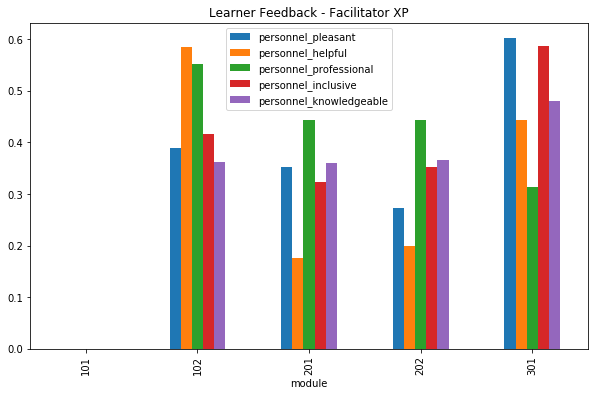

In [16]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

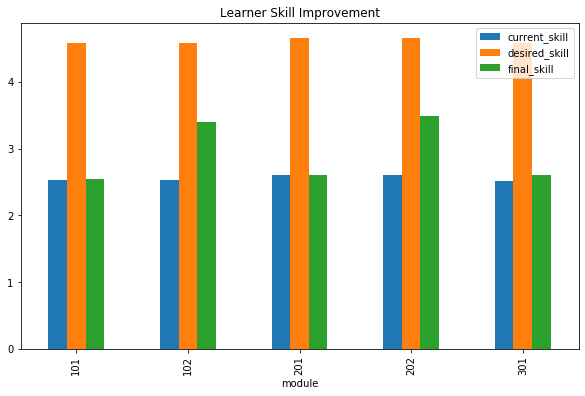

In [17]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [18]:
learning_obj.lo_1.unique()

array(['Exceeded', 'Meet', 'NotMeet'], dtype=object)

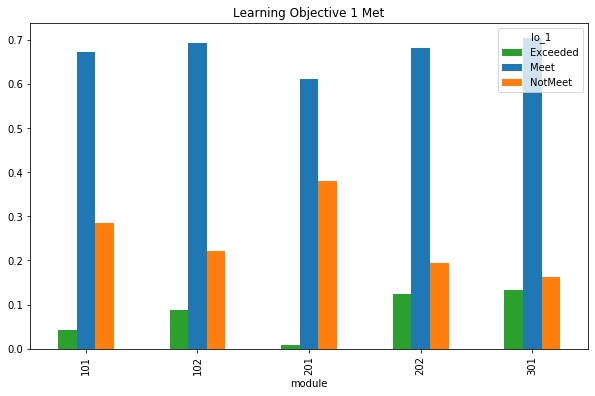

In [19]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

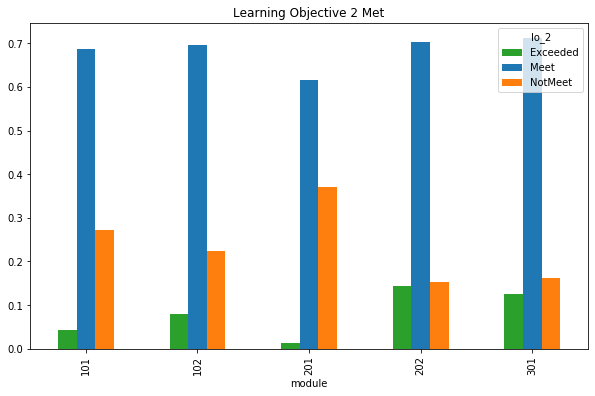

In [20]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [21]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

In [22]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]

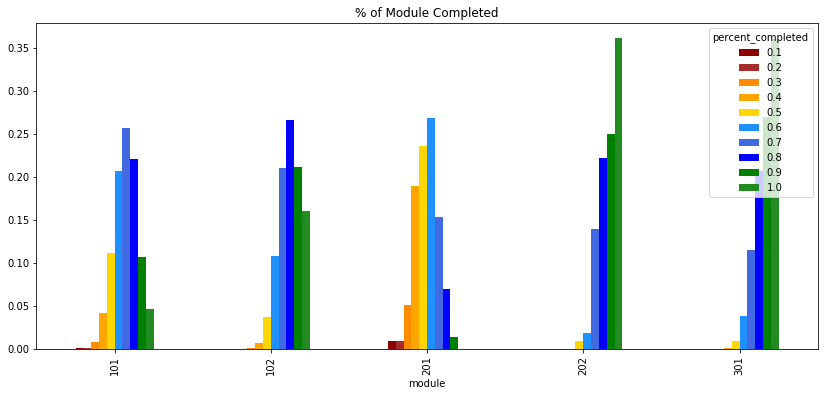

In [23]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

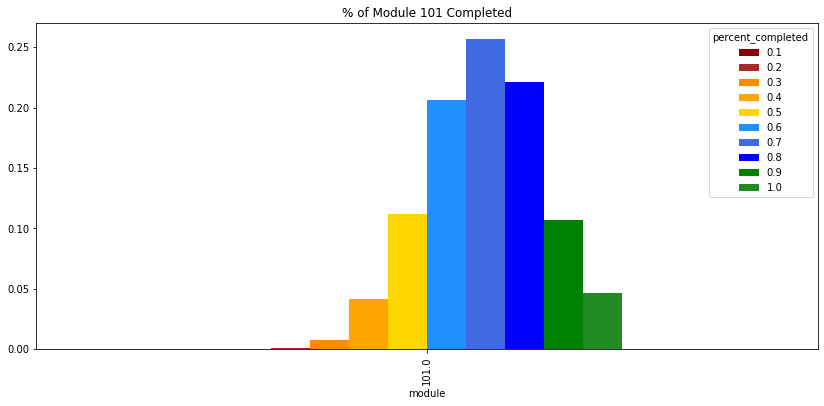

In [24]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [25]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,
877,I501,184,184,215,196,122,61,38
878,I501,172,190,219,179,127,71,42
879,I501,156,193,215,191,128,75,42
880,I501,182,187,217,192,125,49,48
881,I501,164,185,191,202,145,82,31
882,I501,171,187,207,199,120,59,57
883,I501,177,167,191,188,146,85,46
884,I501,169,178,211,197,127,85,33
885,I501,185,156,203,191,133,89,43


In [41]:
seven_grad=["darkred", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]

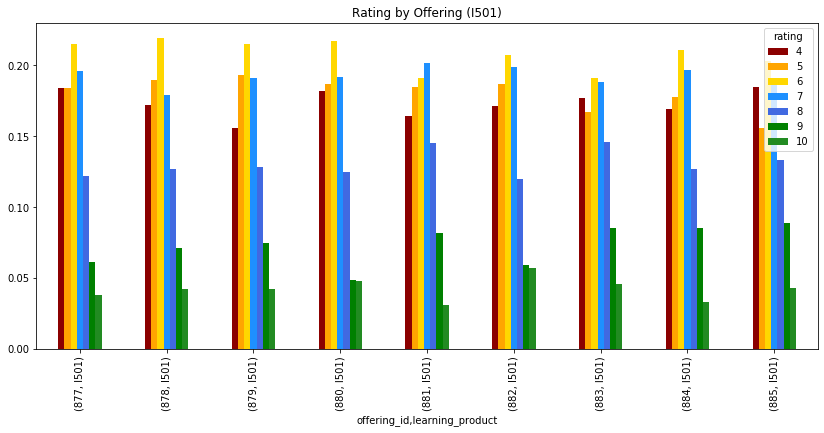

In [42]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=seven_grad)

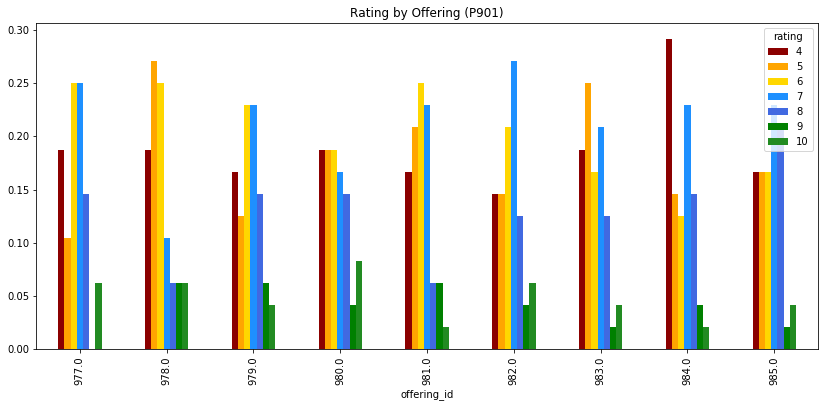

In [43]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=seven_grad)

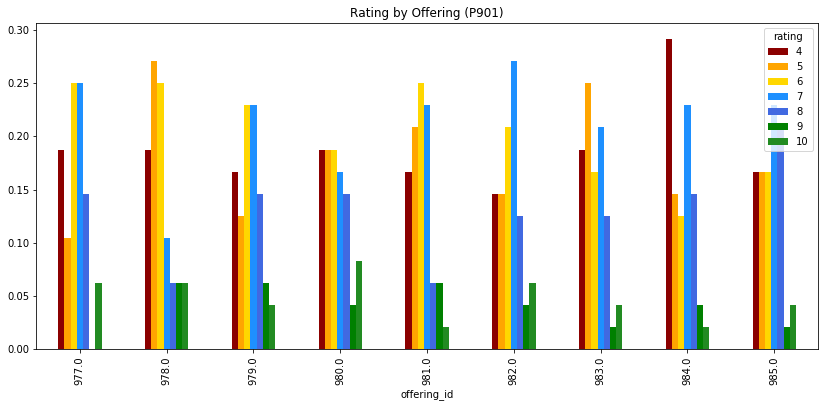

In [44]:
df.groupby(df["offering_id"].where(df.learning_product=="P901"))["rating"].value_counts(normalize=True).unstack().plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=seven_grad)

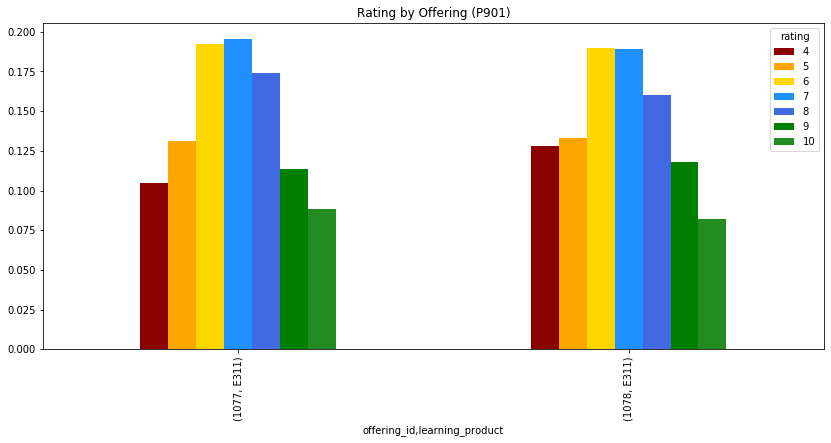

In [45]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="E311")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=seven_grad)

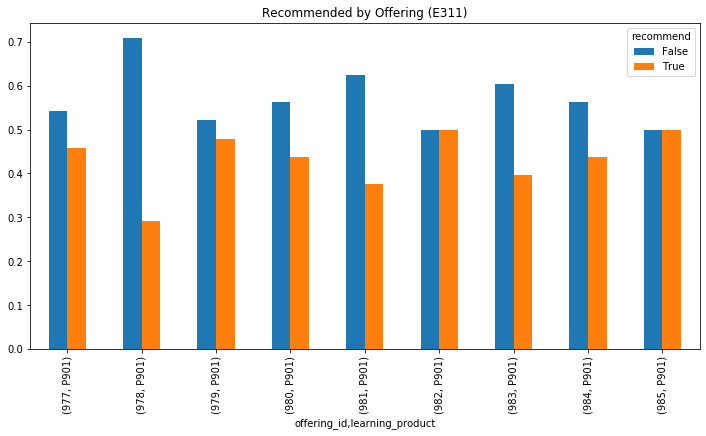

In [31]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

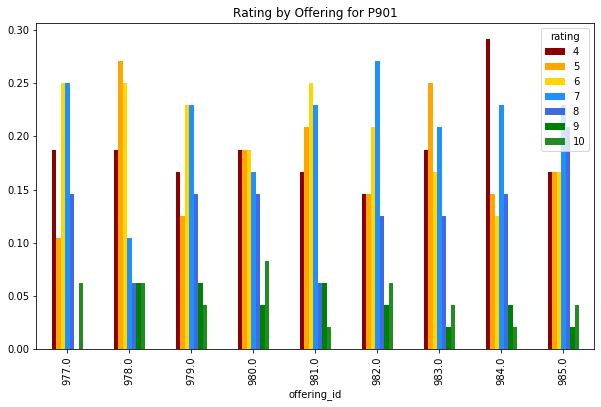

In [46]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=seven_grad)

In [33]:
rating_offering = df[["learning_product", "rating"]]

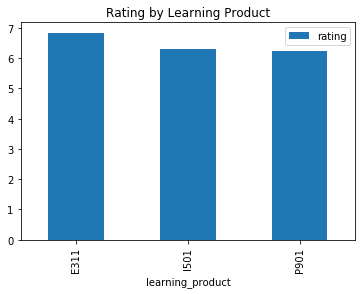

In [34]:
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

In [35]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,6.850000
I501,6.313556
P901,6.231481


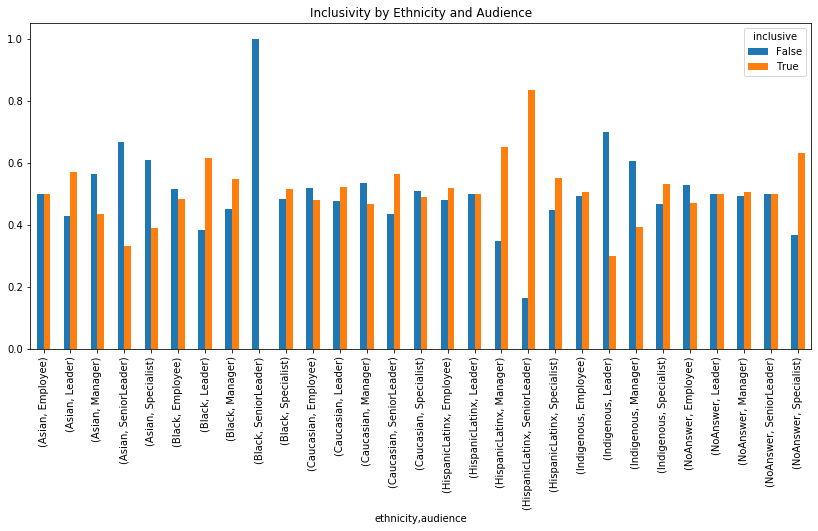

In [36]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

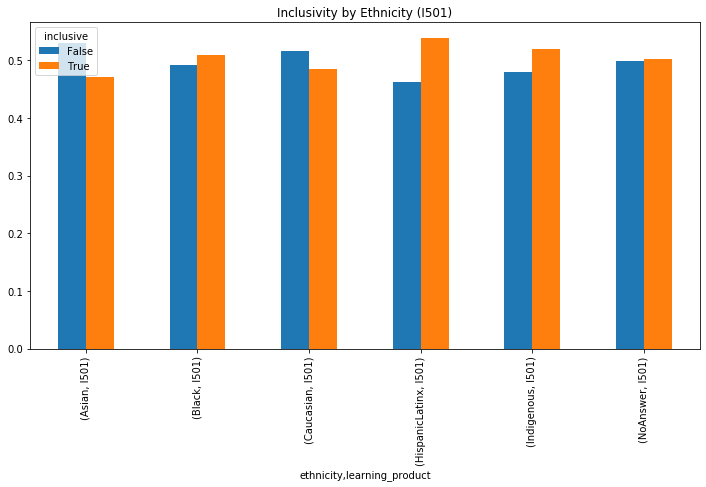

In [37]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

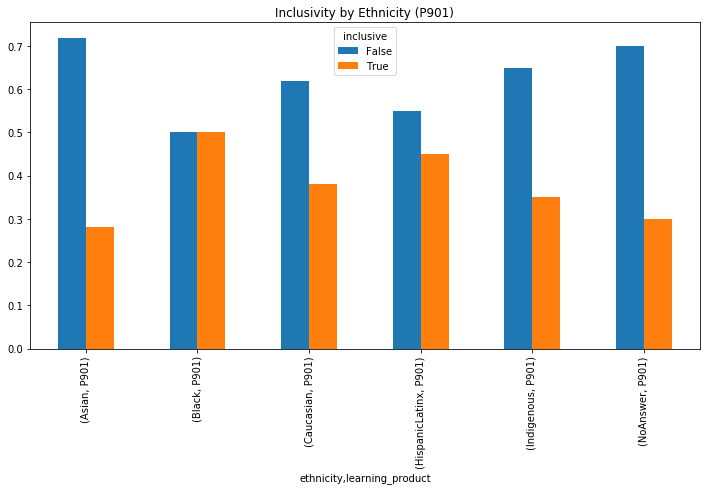

In [38]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

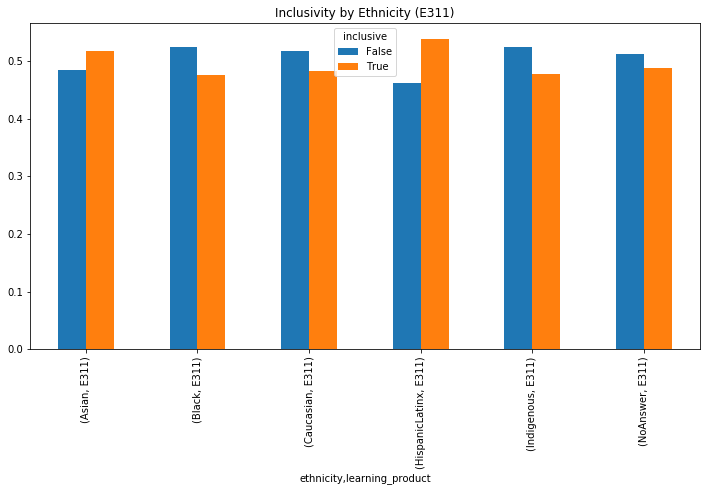

In [39]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (E311)", figsize=(12,6))

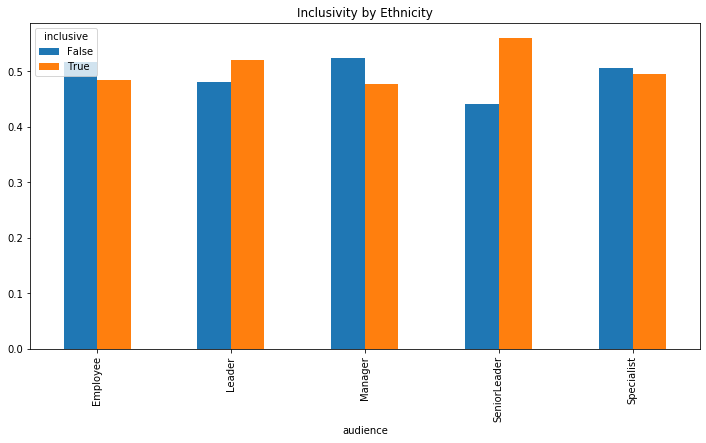

In [40]:
pd.crosstab(df.audience, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(12,6))